In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the CSV
df = pd.read_csv("completeSpamAssassin.csv")
# Check shape and structure
print("Shape:", df.shape)
print("Columns:", df.columns)
df.head()

Shape: (6046, 3)
Columns: Index(['Unnamed: 0', 'Body', 'Label'], dtype='object')


,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


In [9]:
df = df.drop(columns=['Unnamed: 0'])

In [10]:
print("Missing values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

# Optional: drop duplicates
df = df.drop_duplicates()

Missing values:
 Body     1
Label    0
dtype: int64
Duplicates: 752


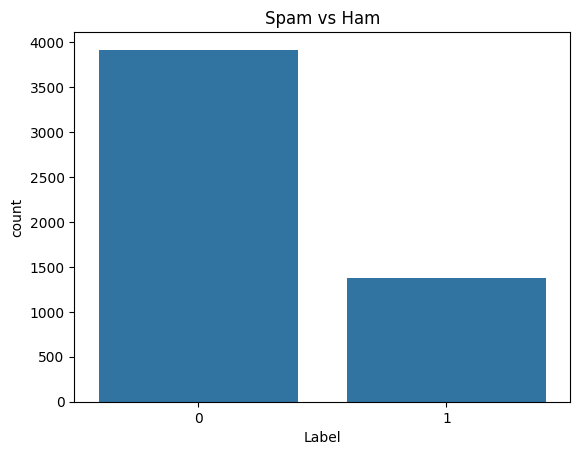

In [11]:
sns.countplot(data=df, x='Label')
plt.title('Spam vs Ham')
plt.show()

In [25]:
# vectorisation initializer
from sklearn.feature_extraction.text import TfidfVectorizer

# Use the cleaned text if available, or raw if not lemmatized
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9)

#drop or fill NaN values in 'Body' if necessary
df['Body'] = df['Body'].fillna('')  # Fill NaN with empty string

# Fit and transform the text data
X = vectorizer.fit_transform(df['Body'])  # Use 'Body' if not preprocessed
y = df['Label']


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train and Evaluate Logistic Reg and naives bayes

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#### Train Logistic Regression

In [29]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

#### Train Naive Bayes

In [30]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)


### Model Evaluation

In [31]:
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

print("\n=== Naive Bayes ===")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


=== Logistic Regression ===
Accuracy: 0.9660056657223796
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       765
           1       1.00      0.88      0.94       294

    accuracy                           0.97      1059
   macro avg       0.98      0.94      0.96      1059
weighted avg       0.97      0.97      0.97      1059


=== Naive Bayes ===
Accuracy: 0.8970727101038716
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       765
           1       1.00      0.63      0.77       294

    accuracy                           0.90      1059
   macro avg       0.94      0.81      0.85      1059
weighted avg       0.91      0.90      0.89      1059



In [32]:
# Trying the SVM here

from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)


from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("=== SVM (LinearSVC) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

=== SVM (LinearSVC) ===
Accuracy: 0.9867799811142587
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       765
           1       0.99      0.96      0.98       294

    accuracy                           0.99      1059
   macro avg       0.99      0.98      0.98      1059
weighted avg       0.99      0.99      0.99      1059



## ✅ 1. Save the Model and Vectorizer

In [33]:
import joblib

# Save the model
joblib.dump(svm, 'svm_spam_classifier.pkl')

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [34]:
# 🔁 2. Load the Model and Vectorizer Later

# Load model and vectorizer
svm_loaded = joblib.load('svm_spam_classifier.pkl')
vectorizer_loaded = joblib.load('tfidf_vectorizer.pkl')


#### Predict using laoded models

In [35]:
# New email example
new_email = ["Congratulations! You've won a free cruise. Call now!"]

# Vectorize using loaded vectorizer
new_email_vector = vectorizer_loaded.transform(new_email)

# Predict using loaded model
prediction = svm_loaded.predict(new_email_vector)

print("Spam" if prediction[0] == 1 else "Ham")


Spam
